In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2
from PIL import Image
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras 
from keras.datasets import mnist 
from tensorflow.math import confusion_matrix

In [2]:
#loading the mnist from keras.datasets 
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
#shape of the numpy array 
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
#Training data  = 60000 images 
#Test data = 10000 images 
#image dimension = 28x28 
#Grayscale image = 28x28 -> 1 channel 

In [6]:
#printng the 10th image 
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(x_train[10].shape)

(28, 28)


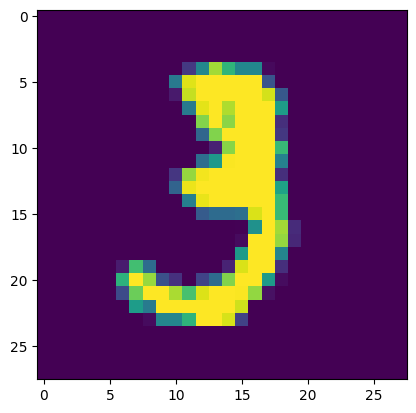

3


In [8]:
#displaying the image 
plt.imshow(x_train[10])
plt.show()

#print the corresponding label 
print(y_train[10])

In [9]:
#image labels 

print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [10]:
#unique values in y_train 
print(np.unique(y_train))
#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
#we can use these labels as such or we can also apply One Hot Encoding 
#All the images have the same dimension in this dataset, if not then we have to resize all the images to a common dimension 

In [12]:
#Scaling the values , 0-255 to 0-1 
x_train = x_train/255 
x_test = x_test/255 

In [13]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [14]:
#Building the Neural network 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\Mridul\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#compiling the neural network 
model.compile(optimizer='adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
#training the model
model.fit(x_train,y_train,epochs=10,)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8521 - loss: 0.5082
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9563 - loss: 0.1460
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9686 - loss: 0.1059
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9756 - loss: 0.0818
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0667
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0553
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9858 - loss: 0.0474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9877 - loss: 0.0402
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0358
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9887 - loss: 0.0330


In [17]:
#Training data accuracy = 99% 
#accuracy on test data 
loss,accuracy = model.evaluate(x_test,y_test) 
print(loss,accuracy)
#test data accuracy = 97% 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9692 - loss: 0.1231
0.11484428495168686 0.9715999960899353


In [18]:
print(x_test.shape)

(10000, 28, 28)


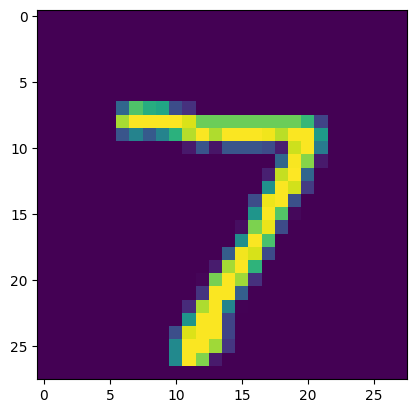

In [19]:
#first datapoint in x_data 
plt.imshow(x_test[0])
plt.show()

In [20]:
print(y_test[0])

7


In [21]:
y_pred = model.predict(x_test)
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
(10000, 10)


In [22]:
print(y_pred[0])

[1.5520436e-03 5.2331161e-04 1.1313217e-04 3.9071238e-01 9.8023645e-07
 8.3614403e-04 1.1067252e-09 9.9999994e-01 9.7199939e-03 8.7515950e-01]


In [23]:
#model.predict() gives the prediction probablity of each class for the particular datapoint 

In [24]:
#converting the prediction probablitys to class label 
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [25]:
#converting the prediction probablity to class label for all test data points 
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [26]:
#Y_test = True Labels 
#Y_pred = predicted labels 
#Confusion Matrix

In [27]:
conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 967    0    0    3    2    0    3    0    2    3]
 [   0 1111    1    4    0    0    5    1   10    3]
 [   4    3  991    4    6    1    2   12    9    0]
 [   0    0    1  988    0    7    0    4    6    4]
 [   0    0    3    0  970    0    4    1    0    4]
 [   2    1    0   10    4  856    6    2    8    3]
 [   4    2    0    1   10    6  934    0    1    0]
 [   0    1    7    6    3    0    0 1002    1    8]
 [   5    0    1    4    5    4    7    2  939    7]
 [   1    2    0    4   36    2    0    3    3  958]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels ')

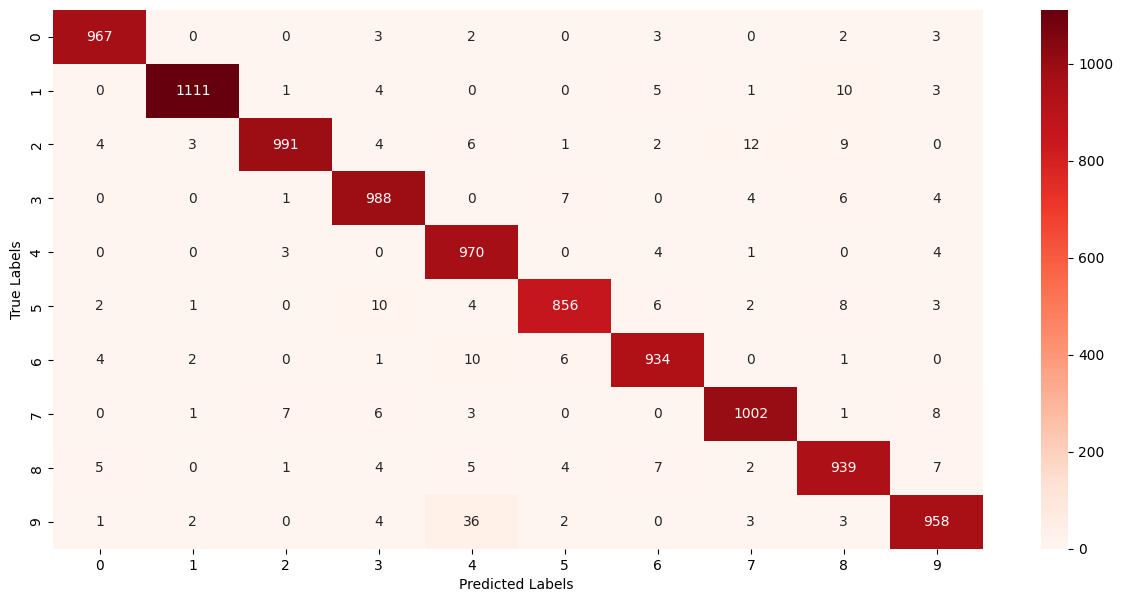

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True, fmt='d',cmap='Reds')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels ")

In [29]:
#Building an predictive system 
input_image = cv2.imread('MNIST_digit.png')
type(input_image)
input_image.shape

(318, 318, 3)

In [31]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY) 

In [32]:
grayscale.shape 

(318, 318)

In [33]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [34]:
input_image_resize.shape

(28, 28)

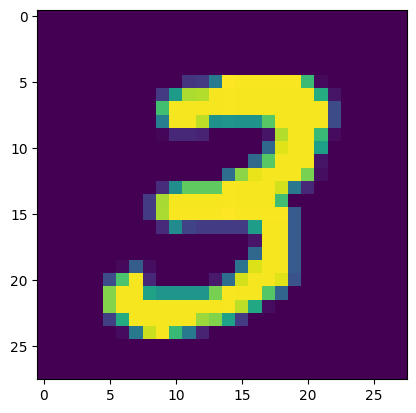

In [35]:
plt.imshow(input_image_resize)
plt.show()

In [37]:
input_image_resize = input_image_resize/255 
#for predicting only for one image, because its trained for large dataset 
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [38]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.13809063 0.12143464 0.19482003 0.15715441 0.77527183 0.60952604
  0.21764514 0.17225339 0.5534049  0.46036494]]


In [39]:
input_pred_label = np.argmax(input_prediction)

In [40]:
print(input_pred_label)

4


In [41]:
#Predictive System 
input_image = cv2.imread('MNIST_digit.png')
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY) 
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize = input_image_resize/255 
image_reshaped = np.reshape(input_image_resize,[1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3
